In [11]:
##Chapter_4.1

#Investigating the temperature dependence of soil thermal conductivity

##Based on the graph below, the thermal conductivity of wet soil is almost independent of moisture content at a soil temperature of 60 degree Celcius
##The temperature where the thermal conductivity is independent with soil water content marks the boundary between the thermal conductivity that is controlled by air in pore spaces (in relatively dry soils) and the termal conductivity that is controlled by soil solids (in relatively wet soils)
    #At this temperature, liquid water starts to be transformed into vapor (maybe). Note: liquid water has relatively high thermal conductivity than gas.
    #At this point, any increase in water content does not change the thermal conductivity of the soil. 


import piplites
await piplite.install('matplotlib')
import matplotlib.pyplot as plt
from math import exp
import numpy as np
from PSP_thermalCond import *

bulkDensity=1300
waterContent= np.linspace(0, 0.5, 20)
clay=.4
temperature = [0, 15, 30, 45, 60, 75, 90]    # in degree Celcius
print(temperature)

[0, 15, 30, 45, 60, 75, 90]


0.18170910251940214
0.1994593015668096
0.22852492700997168
0.2676691014593019
0.3154559179873261
0.3715253822417149
0.4358132379965204
0.5058960771946605
0.576640230728212
0.6439087696526632
0.7068361443552007
0.766588972405134
0.8246812033240561
0.8822927369948501
0.9402051393597601
0.9989018366863572
1.058665938920686
1.1196460609401646
1.1818964110477264
1.2454009634889118
0.1885009861726169
0.20690921555312966
0.23708282659362176
0.27831219739123725
0.3308072021643165
0.39688654895901315
0.47768481406196983
0.5671164272432018
0.6537341378758077
0.730137677775434
0.7960365643018598
0.8544571002986647
0.9084863713044822
0.9603146870389428
1.0113218446159995
1.0623467244519667
1.1138947185535286
1.1662649867830623
1.2196236213315654
1.2740456028475806
0.19521635247909458
0.21427429169876644
0.24565388380373296
0.28990389443528014
0.35079320633796046
0.4354468581194619
0.5446374561551328
0.6627677113638546
0.7688490080531151
0.8537186302409913
0.9199973674085474
0.9738627935584853
1.02

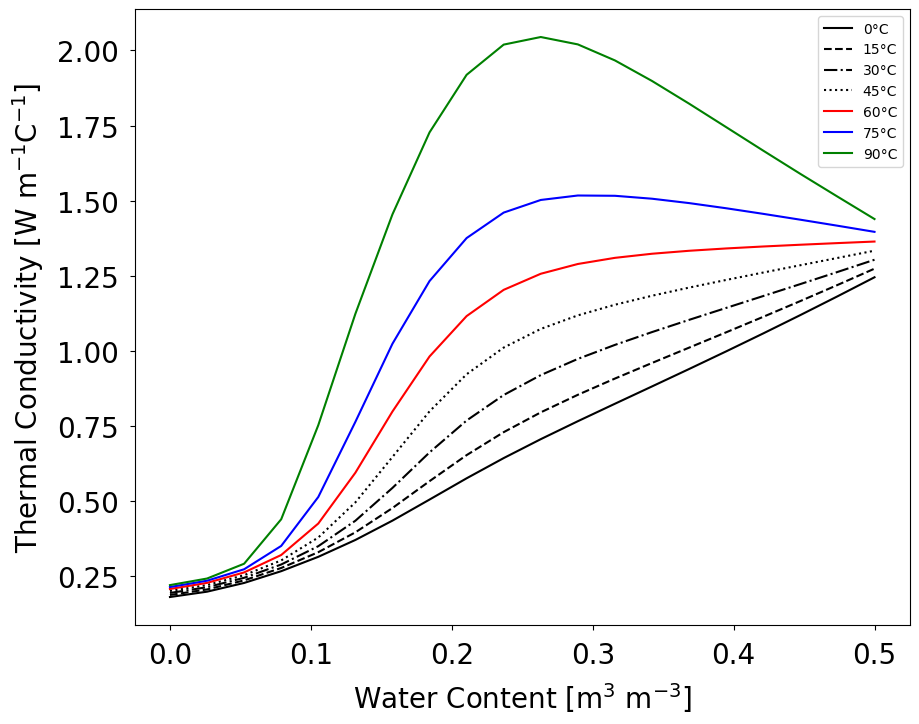

In [13]:

for y in temperature:
    for x in waterContent:
        K= thermalConductivity(bulkDensity, x, clay, y)
        print(K)

fig = plt.figure(figsize=(10,8))
plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]',fontsize=20,labelpad=8)
plt.ylabel('Thermal Conductivity [W m$^{-1}$C$^{-1}$]',fontsize=20,labelpad=8)
plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)

thermalConductivityArray = np.zeros((len(temperature), len(waterContent)))

for t in range(len(temperature)):
    for i in range(len(waterContent)):
        thermalConductivityArray[t, i] = thermalConductivity(bulkDensity, waterContent[i], clay, temperature[t])
    if t == 0:
        plt.plot(waterContent, thermalConductivityArray[t], 'k', label=f'{temperature[t]}°C')
    elif t == 1:
        plt.plot(waterContent, thermalConductivityArray[t], '--k', label=f'{temperature[t]}°C')   #thermal conductivity at 15 degree Celcius
    elif t == 2:
        plt.plot(waterContent, thermalConductivityArray[t], '-.k', label=f'{temperature[t]}°C')   #thermal conductivity at 30 degree Celcius
    elif t == 3:
        plt.plot(waterContent, thermalConductivityArray[t], ':k', label=f'{temperature[t]}°C')    #thermal conductivity at 45 degree Celcius
    elif t == 4:  # Additional line for 60°C
        plt.plot(waterContent, thermalConductivityArray[t], '-r', label=f'{temperature[t]}°C')    #thermal conductivity at 60 degree Celcius
    elif t == 5:  # Additional line for 75°C
        plt.plot(waterContent, thermalConductivityArray[t], '-b', label=f'{temperature[t]}°C')    #thermal conductivity at 75 degree Celcius
    elif t == 6:  # Additional line for 90°C
        plt.plot(waterContent, thermalConductivityArray[t], '-g', label=f'{temperature[t]}°C')    #thermal conductivity at 90 degree Celcius

plt.legend()
plt.show()

In [21]:
##Chapter_4.2
#Volumetric heat capacity (Ch) calculation

##Based on the results, Ch of mineral soils ranges from 1.17 to 3.51 MJ/m3/K


#Defining variables

#Note: Ch is strongly dependent on volumetric water content 

Db_min = 1000     # assumed minimum bulk density value[Kg/m3]

Db_max = 1800     # assumed maximum bulk density value [Kg/m3]

Dp = 2650         # assumed particle density value (from quartz) [Kg/m3]

Cs = 2.4e6        # volumetric_heat_capacity of solids [J/m3/K]
                  # usual value for mineral soils (from Table 4.1 -p. 65)

Cl = 4.18e6       # volumetric_heat_capacity of liquid [J/m3/K]
                  # from Table 4.1 -p. 65

#Formulas

Vf_Dbmin = 1 - (Db_min/Dp)    # volume fraction of pores with minimum bulk density value (1000 kg/m3) [m3/m3]
Vf_Dbmax = 1 - (Db_max/Dp)    # volume fraction of pores with maximum bulk density value (1800 kg/m3) [m3/m3]

Sf_Dbmin = 1 - Vf_Dbmin       # volume_fraction of solids with minimum bulk density value (1000 kg/m3) [m3/m3]
Sf_Dbmax = 1 - Vf_Dbmax       # volume_fraction of solids with maximum bulk density value (1800 kg/m3) [m3/m3]

Lf_Dbminsat = Vf_Dbmin        # volume fraction of liquid with minimum bulk density value (1000 kg/m3) at saturation [m3/m3] 

Lf_Dbmaxsat = Vf_Dbmax        # volume fraction of liquid with maximum bulk density value (1800 kg/m3) at saturation [m3/m3]

Lf_Dbmin10 = Vf_Dbmin * 0.1   # volume fraction of liquid with minimum bulk density value (1000 kg/m3) at 10% volumetric water content [m3/m3]

Lf_Dbmax10 = Vf_Dbmax * 0.1   # volume fraction of liquid with maximum bulk density value (1800 kg/m3) at 10% volumetric water content [m3/m3]


#Calculation of Ch for each soil with different Db and volumetric water content values

Ch_Dbminsat = Cs * Sf_Dbmin + Cl * Lf_Dbminsat    # total volumetric_heat_capacity of soil with minimum bulk density value (1000 kg/m3) at saturation [J/m3/K]
Ch_Dbmaxsat = Cs * Sf_Dbmax + Cl * Lf_Dbmaxsat    # total volumetric_heat_capacity of soil with maximum bulk density value (1800 kg/m3) at saturation [J/m3/K]
Ch_Dbmin10 = Cs * Sf_Dbmin + Cl * Lf_Dbmin10      # total volumetric_heat_capacity of soil with minimum bulk density value (1000 kg/m3) at 10% volumetric water content [J/m3/K]
Ch_Dbmax10 = Cs * Sf_Dbmax + Cl * Lf_Dbmax10      # total volumetric_heat_capacity of soil with maximum bulk density value (1800 kg/m3) at 10% volumetric water content [J/m3/K]

print ('%E' % (Ch_Dbminsat), ' = maximum Ch value')
print ('%E' % (Ch_Dbmaxsat))
print ('%E' % (Ch_Dbmin10), ' = minimum Ch value')
print ('%E' % (Ch_Dbmax10))

3.508302E+06  = maximum Ch value
2.970943E+06
1.165925E+06  = minimum Ch value
1.764264E+06


In [6]:
##Chapter_4.3

#Still working....

from __future__ import print_function, division
import PSP_grid as grid
from PSP_ThomasAlgorithm import *
import numpy as np
from PSP_heat import finiteDifference

# Assuming airT, boundaryT, dt, and factor have appropriate values
airT_value = 25.0  # Example value, replace with actual value
boundaryT_value = 15.0  # Example value, replace with actual value
dt_value = 0.1  # Example value, replace with actual value
factor_value = 0.5  # Example value, replace with actual value

result, iterations, flux = finiteDifference(airT_value, boundaryT_value, dt_value, factor_value)

# Display the result
print("Convergence:", result)
print("Number of iterations:", iterations)
print("Flux:", flux)


Convergence: False
Number of iterations: 1
Flux: 0


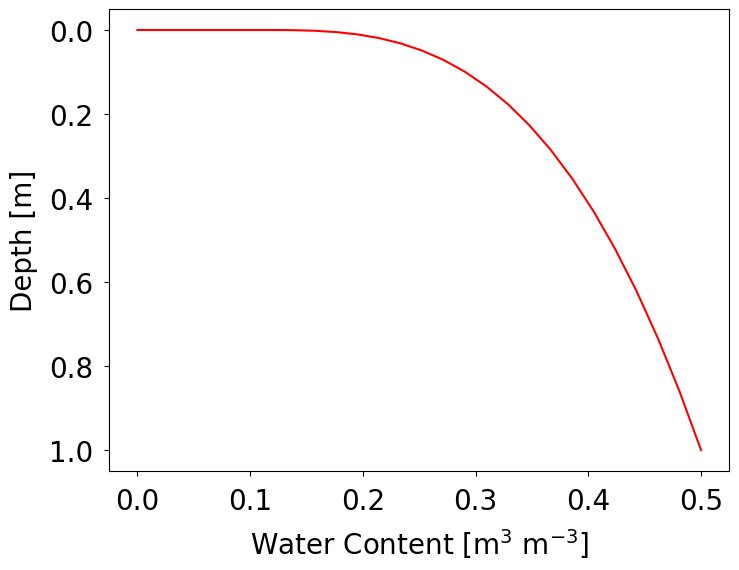

In [49]:
##Chapter_4.4

##Soil water content with depth

from __future__ import print_function, division
import matplotlib.pyplot as plt
import PSP_grid as grid
from PSP_ThomasAlgorithm import *
import numpy as np
from PSP_heatSoil import *

area = 1                    	
maxNrIterations = 100
tolerance = 1.e-2               
T_0 = 25                                  #Assumed initial temperature
n = 20                        
z = np.zeros(n+2, float)  
zCenter = np.zeros(n+2, float)      
dz = np.zeros(n+2, float)       
vol = np.zeros(n+2, float)     
wc = np.zeros(n+2, float)       
a = np.zeros(n+2, float)        
b = np.zeros(n+2, float)        
c = np.zeros(n+2, float)        
d = np.zeros(n+2, float)       

T = np.zeros(n+2, float)      
dT = np.zeros(n+2, float)       
oldT = np.zeros(n+2, float)     
C_T = np.zeros(n+2, float)     
lambda_ = np.zeros(n+2, float)  
k_mean = np.zeros(n+2, float)   
f = np.zeros(n+2, float)       

def initialize(T_0, thetaIni, solver):
    global z, dz, zCenter, vol, wc, T, oldT
    # vector depth [m]
    z = grid.geometric(n, 1.0)
  
    vol[0] = 0
    for i in range(n+1): 
        dz[i] = z[i+1]-z[i]
        if (i > 0): vol[i] = area * dz[i]
    for i in range(n+2): 
        zCenter[i] = z[i] + dz[i]*0.5
        
    if (solver == CELL_CENT_FIN_VOL):
        for i in range(n+1): 
            dz[i] = zCenter[i+1]-zCenter[i]
                 
    for i in range(1, n+2):
        T[i] = T_0
        oldT[i] = T_0
        wc[i] = thetaIni[i]               #Set water content with depth
    return z

thetaIni = np.linspace(0.1, 0.5, n+2)  
initialize(T_0, thetaIni, solver)

def finiteDifference(airT, boundaryT, dt, factor):
    g = 1.0 - factor
    energyBalance = 1.
    for i in range(1, n+2):
        T[i] = oldT[i]
    nrIterations = 0
    while ((energyBalance > tolerance) and (nrIterations < maxNrIterations)):
        for i in range(1, n+2):
            #lambda_[0]= 20.
            lambda_[i] = thermalConductivity(bulkDensity, wc[i], clay, T[i])
            C_T[i] = heatCapacity(bulkDensity, wc[i])*vol[i]
        f[0] = 0.
        for i in range(1, n+1):
            f[i]=area* lambda_[i] / dz[i]
        for i in range(1, n+1):    
            if (i == 1):
                a[i] = 0.
                b[i] = 1.
                c[i] = 0.
                d[i] = airT
            elif (i < n):
                a[i] = -f[i-1]*factor
                b[i] = C_T[i]/dt + f[i-1]*factor + f[i]*factor
                c[i] = -f[i]*factor
                d[i] = C_T[i]/dt * oldT[i] +(1.-factor)*(f[i-1]*oldT[i-1]+f[i]
                                            *oldT[i+1]-(f[i-1]+f[i])*oldT[i])
            elif (i == n):
                a[n] = 0.
                b[n] = 1.
                c[n] = 0.
                d[n] = boundaryT 
        ThomasBoundaryCondition(a, b, c, d, T, 1, n)
        dSum = 0
        for i in range(2, n):
            dSum += C_T[i]*(T[i]-oldT[i])
        energyBalance = (abs(dSum - factor*dt*(f[1]*(T[1]-T[2]) 
                    - f[n-1]*(T[n-1]-boundaryT)) - g*dt*(f[1]*(oldT[1]-oldT[2]) 
                    - f[n-1]*(oldT[n-1]-boundaryT))))
        nrIterations += 1
        
    if (energyBalance < tolerance):
        flux = f[1]*(T[1]-T[2])
        return True, nrIterations, flux
    else:
        return False, nrIterations, 0

        
def cellCentFiniteVol(airT, boundaryT, dt):
    energyBalance = 1.
    for i in range(1, n+2):
        T[i] = oldT[i] 
    nrIterations = 0
    while ((energyBalance > tolerance) and (nrIterations < maxNrIterations)):
        for i in range(1, n+2):
            lambda_[i] = thermalConductivity(bulkDensity, wc[i], clay, T[i])
            C_T[i] = heatCapacity(bulkDensity, wc[i])*vol[i]
        f[0] = 0.
        for i in range(1, n+1):
            f[i] = area * kMean(LOGARITHMIC, lambda_[i], lambda_[i+1]) / dz[i]
        for i in range(1, n+1):    
            if (i == 1):
                a[i] = 0.
                b[i] = 1.
                c[i] = 0.
                d[i] = airT
            elif (i < n):
                a[i] = -f[i-1]
                b[i] = C_T[i]/dt + f[i-1] + f[i]
                c[i] = -f[i]
                d[i] = C_T[i]/dt * oldT[i]
            elif (i == n):
                a[n] = 0.
                b[n] = 1.
                c[n] = 0.
                d[n] = boundaryT 
        ThomasBoundaryCondition(a, b, c, d, T, 1, n)
        dSum = 0
        for i in range(2, n):
            dSum += C_T[i]*(T[i]-oldT[i])
        energyBalance = (abs(dSum - f[1]*(T[1]-T[2])*dt 
                           + f[n-1]*(T[n-1]-boundaryT)*dt))
        nrIterations += 1
        
    if (energyBalance < tolerance):
        flux = f[1]*(T[1]-T[2])
        return True, nrIterations, flux
    else:
        return False, nrIterations, 0

plt.figure(figsize=(8, 6))
plt.plot(wc, z, color='red')  
plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]', fontsize=20, labelpad=8)
plt.ylabel('Depth [m]', fontsize=20, labelpad=8)
plt.tick_params(axis='both', which='major', labelsize=20, pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20, pad=8)
plt.grid(False)

plt.gca().invert_yaxis()
plt.show()

In [66]:
##Chapter_4.5

##Soil temperature with depth

#Still working...

import matplotlib.pyplot as plt
import PSP_thermalCond as soil
from PSP_readDataFile import *
import csv

def readDataFile(file, nrHeaderFields, delimiter, isPrintScreen):
    try:
        with open(file, "rt") as f:
            reader = csv.reader(f, delimiter=delimiter)
            data = []
            for _ in range(nrHeaderFields):
                next(reader)  # Skip header rows

            for row in reader:
                try:
                    data.append([float(value) for value in row])
                except ValueError:
                    pass  # Skip non-numeric rows

        return data, True
    except FileNotFoundError:
        print("File not found:", file)
        return None, False
        
def main():
    A, isFileOk = readDataFile("soilTemperatures.txt", 1, ',', False)  # Skip header row
    if not isFileOk: 
        print("Incorrect format")
        return

    depths = [float(row[0]) for row in A]  # Assuming depths are in the first column
    temperatures = [row[1:] for row in A]  # Assuming temperatures start from the second column

    print("Depths:", depths)  # Debugging print statement

    try:
        # Find the indices corresponding to depths 0.15 and 0.3 meters
        index_0_15 = depths.index(0.15)
        index_0_3 = depths.index(0.3)

        # Extract soil temperatures at depths 0.15 and 0.3 meters
        soilTemperature_0_15 = temperatures[index_0_15]
        soilTemperature_0_3 = temperatures[index_0_3]

        print("Temperature at depth 0.15 meters:", soilTemperature_0_15)
        print("Temperature at depth 0.3 meters:", soilTemperature_0_3)

        nrTemperatures = len(soilTemperature_0_15)
        print("Number of temperatures =", nrTemperatures)

        myStr = "bulk density [kg/m^3]: " 
        bulkDensity = float(input(myStr))
        myStr = "clay [0 - 1]: " 
        clay = float(input(myStr))

        particleDensity = 2650
        porosity = 1 - (bulkDensity / particleDensity) 

        step = 0.02  
        nrValues = int(porosity / step) + 1
        waterContent = np.zeros(nrValues)
        thermalConductivity = np.zeros(nrValues)  

        for i in range(nrValues):
            waterContent[i] = step * i

        fig = plt.figure(figsize=(10, 8))
        plt.xlabel('Water Content [m$^{3}$ m$^{-3}$]', fontsize=20, labelpad=8)
        plt.ylabel('Thermal Conductivity [W m$^{-1}$C$^{-1}$]', fontsize=20, labelpad=8)
        plt.tick_params(axis='both', which='major', labelsize=20, pad=8)
        plt.tick_params(axis='both', which='minor', labelsize=20, pad=8)

        for t in range(nrTemperatures):
            for i in range(nrValues):
                thermalConductivity[i] = soil.thermalConductivity(bulkDensity, 
                                        waterContent[i], clay, soilTemperature_0_15[t])
            if t == 0:
                plt.plot(waterContent, thermalConductivity, 'k')
            elif t == 1:
                plt.plot(waterContent, thermalConductivity, '--k')
            elif t == 2:
                plt.plot(waterContent, thermalConductivity, '-.k')
            elif t == 3:
                plt.plot(waterContent, thermalConductivity, ':k')

        plt.show() 

    except ValueError as e:
        print("ValueError:", e)

main()


Depths: []
ValueError: 0.15 is not in list


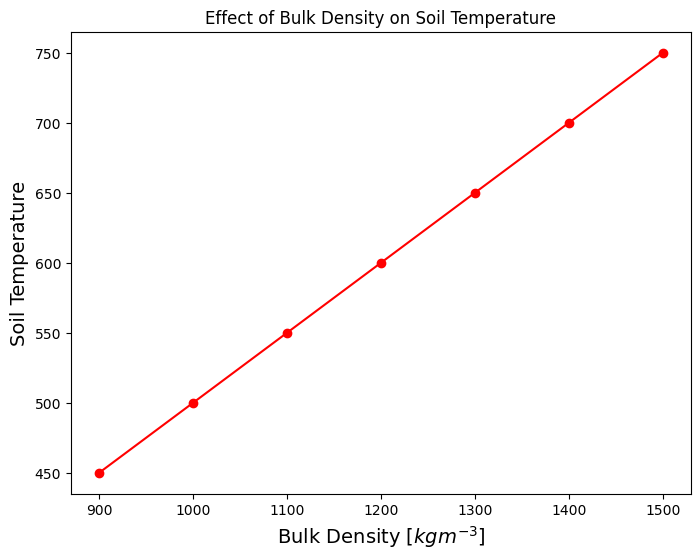

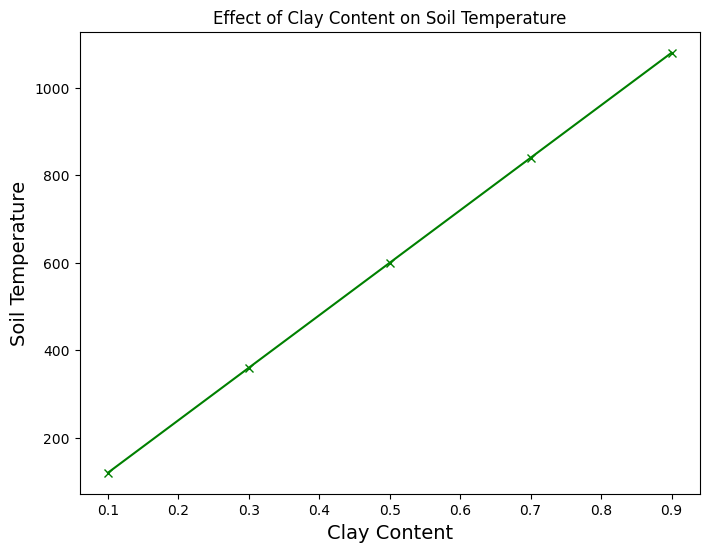

In [2]:
##Chapter_4.6

##Effects of clay content and bulk density on soil temperature

#Still working...

%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PSP_readDataFile import *
from math import sqrt, log

def calculate_soil_temperature(bulk_density, clay_content):
    return bulk_density * clay_content

#Bulk density and clay content ranges

bulk_density_range = np.arange(900, 1501, 100)
clay_content_range = np.arange(0.1, 1.0, 0.2)

#Initialize lists to store soil temperature values

soil_temperature_bulk_density = []
soil_temperature_clay_content = []

#Calculate soil temperature for bulk density

for bulk_density in bulk_density_range:
    soil_temperature_bulk_density.append(calculate_soil_temperature(bulk_density, 0.5))  # Assuming constant clay content

# Calculate soil temperature for clay content
for clay_content in clay_content_range:
    soil_temperature_clay_content.append(calculate_soil_temperature(1200, clay_content))  # Assuming constant bulk density

#Plot soil temperature vs bulk density

plt.figure(figsize=(8, 6))
plt.plot(bulk_density_range, soil_temperature_bulk_density, marker='o', color = 'red')
plt.xlabel('Bulk Density [$kg  m^{-3}$]', size = 14)
plt.ylabel('Soil Temperature', size = 14)
plt.title('Effect of Bulk Density on Soil Temperature')
plt.grid(False)
plt.show()

#Plot soil temperature vs clay content
plt.figure(figsize=(8, 6))
plt.plot(clay_content_range, soil_temperature_clay_content, marker='x', color = 'green')
plt.xlabel('Clay Content', size = 14)
plt.ylabel('Soil Temperature', size = 14)
plt.title('Effect of Clay Content on Soil Temperature', size = 12)
plt.grid(False)
plt.show()

In [4]:
##Chapter_4.7

##PSP_heat

#Still working...

import piplites  # Corrected module name
await piplites.install('matplotlib')  # Corrected module name
import matplotlib.pyplot as plt
%run PSP_heat.py


<class 'ModuleNotFoundError'>: No module named 'piplites'